In [1]:
# Przykład jak wczytać dane do ramki danych z użyciem biblioteki "pandas"
# a następnie narysować na wykresie punktowym przy użyciu biblioteki "matplotlib"

# Użyjemy zbioru danych "Advertising", który zawiera obserwacje o sprzedaży pewnego produktu na 200 rynkach
# wraz z budżetem reklamowym przeznaczonym na różne rodzaje mediów: TV, radio i prasę.
# Sprzedaż wyrażona jest w pewnych jednostkach sprzedaży. Budżet w jednostkach pieniężnych ($).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# możemy załadować dane w formacie CSV do naszej ramki danych (data frame) bezpośrednio z adresu HTTP. 
# ponizej adres zbioru "Advertising" z repozytorium naszego kursu na githubie (https://github.com/mateuszr/ml-course-1) 
df = pd.read_csv('https://raw.githubusercontent.com/mateuszr/ml-course-1/main/datasets/advertising.csv')

In [4]:
# Możemy załdować dane również w inny sposób: uploadując plik do notebooka (nalezy wybrać po lewej stronie ikonę "Files" -> "Upload")
# a nastepnie załadować plik w nastepujący sposób:
#df = pd.read_csv('advertising.csv')

# Trzeci sposób to skopiowanie pliku csv na dysk Google Drive (powiązany z tym samym kontem google). 
# Wrzucamy plik do katalogu "Data" na naszym dysku Google Drive. 
# Nastepnie trzeba zamontować dysk w tym notebooku (Ikonka "Files" -> "Mount Drive")
# na koncu mozna skopiowac plik z dysku Google Drive to notebooka za pomocą komendy:
#!cp /content/drive/MyDrive/Data/advertising.csv /content/

# Należy pamiętać, że za każdym razem kiedy wyjdziemy z notebooka to wszytskie dane które zuploadowaliśmy do notebooka przepadną.

In [5]:
# wydrukowanie informacji o ramce danych: ilość wierszy i kolumn 
print("Size of the data:", df.shape)

# wydrukowanie "nagłówka, w tym wypadku pierwszych 5 wierszy naszego zbioru danych"
# zauważmy, że nasz zbiór danych wejściowych posiadał nagłówek z nazwami kolumn i 
# i biblioteka pandas odpowiednio to zinterpretowała, dzięki czemu nasza ramka danych posiada nazwy kolumn ("TV", "Radio"...)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Można też wprost wywołać taką ramkę danych (podając tylko nazwę zmiennej 'df'). 
# Zauważmy, że python nie zaleje nas całą zawartością data frame'a, ale inteligentnie przytnie wyświetloną ramkę do mniejszej ilości wierszy
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
# Na ramkach danych można używać tzw. slicingu ("wykrojów", "wycinków") czyli określić które wiersze chcemy wyświetlić
# Indeksowanie zaczyna się od 0. W tym przykładzie wybieramy elementy od 0 do 10 (wyłącznie, tj bez elementu 10)
df[0:10]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [8]:
# Ramki danych w bibliotece pandas posiadają też specjalną składnię do wyboru kolumn
df["Sales"]

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [9]:
# Można też wybrać kilka kolumn na raz, w tym celu przekazujemy listę (array) z nazwami kolumn: ["Sales", "TV"]
df[["Sales", "TV"]]

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,12.0,17.2
3,16.5,151.5
4,17.9,180.8
...,...,...
195,7.6,38.2
196,14.0,94.2
197,14.8,177.0
198,25.5,283.6


In [10]:
# składnia pozwalająca połączyć "slicing" z wyborem kolumn
df.loc[0:2, ["Sales", "TV"]]

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,12.0,17.2


Text(0.5, 1.0, 'Sales vs TV')

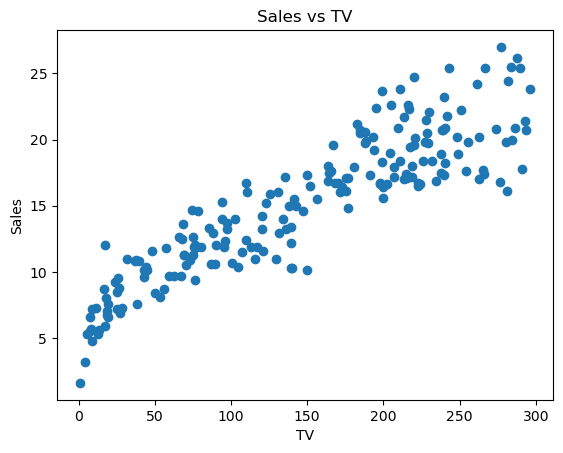

In [11]:
# rysowanie wykresu punktowego dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w TV
plot.scatter(df["TV"], df["Sales"])
# nazwy osi i nazwy wykresu
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

Text(0.5, 1.0, 'Sales vs Newspaper')

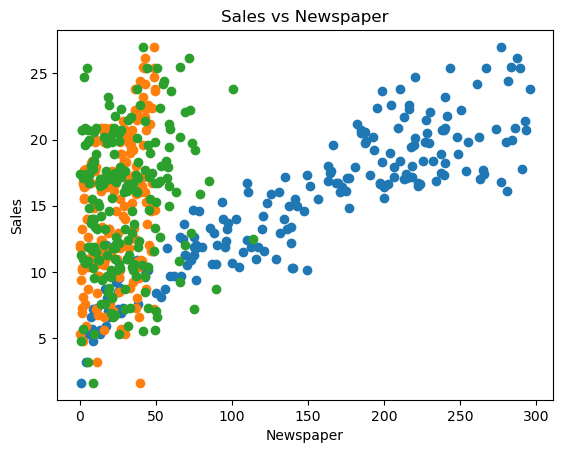

In [12]:
# połączenie 3 wykresów punktowych na jednym

# Wykres punktowy dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w TV
plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

# wykres punktowy dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w radiu
plot.scatter(df["Radio"], df["Sales"])
plot.xlabel("Radio")
plot.ylabel("Sales")
plot.title("Sales vs Radio")

# wykres punktowy dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w prasie
plot.scatter(df["Newspaper"], df["Sales"])
plot.xlabel("Newspaper")
plot.ylabel("Sales")
plot.title("Sales vs Newspaper")


Text(0.5, 1.0, 'Sales vs Radio')

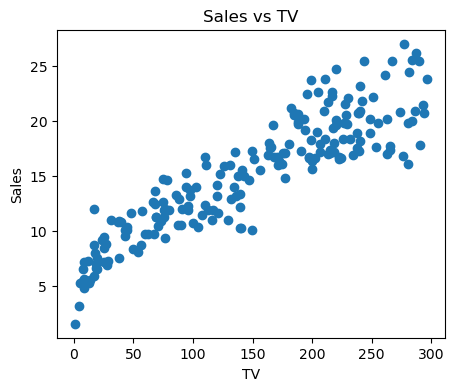

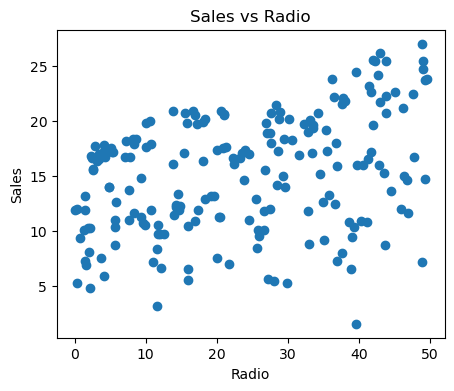

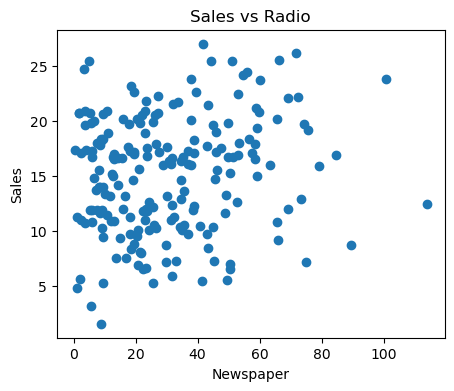

In [13]:
# 3 wykresy punktowe jeden po drugim
f, ax = plot.subplots(figsize=(5, 4))
plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

f, ax = plot.subplots(figsize=(5, 4))
plot.scatter(df["Radio"], df["Sales"])
plot.xlabel("Radio")
plot.ylabel("Sales")
plot.title("Sales vs Radio")

f, ax = plot.subplots(figsize=(5, 4))
plot.scatter(df["Newspaper"], df["Sales"])
plot.xlabel("Newspaper")
plot.ylabel("Sales")
plot.title("Sales vs Radio")

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

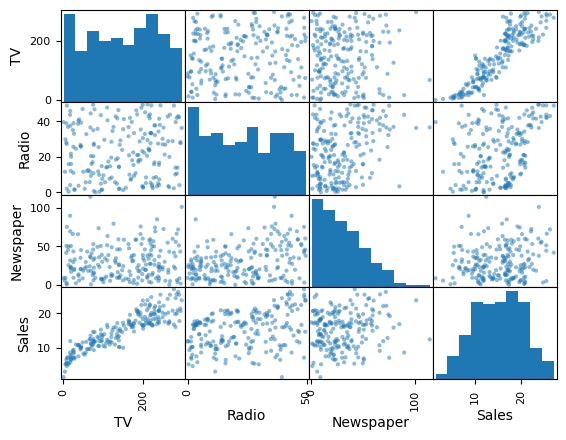

In [14]:
# Możemy również wyświetlić wykres punktowy dla każdej pary kolumn z naszej ramki danych ("Każdy z każdym").
# Ten sposób może być przydatny gdy chcemy szybko zerknąć na dane i poszukać gdzie są korelacje.

pd.plotting.scatter_matrix(df)
